In [1]:
import numpy as np
import sys

from keras.models import load_model
from progressbar import ProgressBar

module_path = '/home/diplomski-rad/consensus-net/src/python/utils/'
if module_path not in sys.path:
    print('Adding utils module.')
    sys.path.append(module_path)

import visualization

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Adding utils module.


# Validation dataset

## Load data

In [2]:
X_validate, y_validate = np.load('./dataset-n20-X-validate.npy'), np.load('./dataset-n20-y-validate.npy')

## Helper functions

In [3]:
def generate_predictions(probabilities):
    predictions = np.zeros(probabilities.shape)
    predictions[np.arange(probabilities.shape[0]), np.argmax(probabilities, axis=1)] = 1
    return predictions

## Investigate model 15

In [4]:
model = load_model('./model-15.h5')

probabilities = model.predict(X_validate)
predictions = generate_predictions(probabilities)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


### Visualize random incorrect

perm [515730]


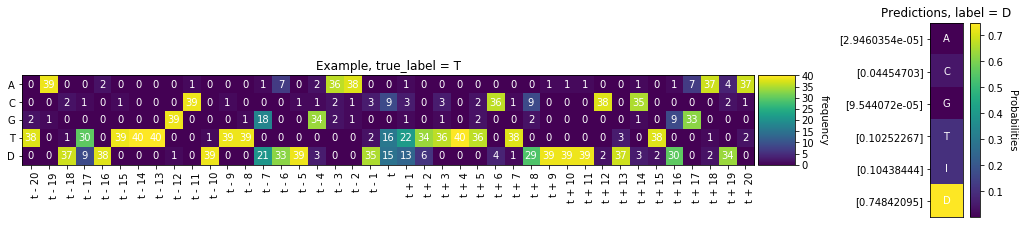

In [19]:
num_display = 1
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
permuted_incorrect_indices = np.random.permutation(incorrect_indices)[:num_display]
print('perm', permuted_incorrect_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_incorrect_indices], y_validate[permuted_incorrect_indices], probabilities[permuted_incorrect_indices], predictions[permuted_incorrect_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Visualize random correct

perm [1063900]


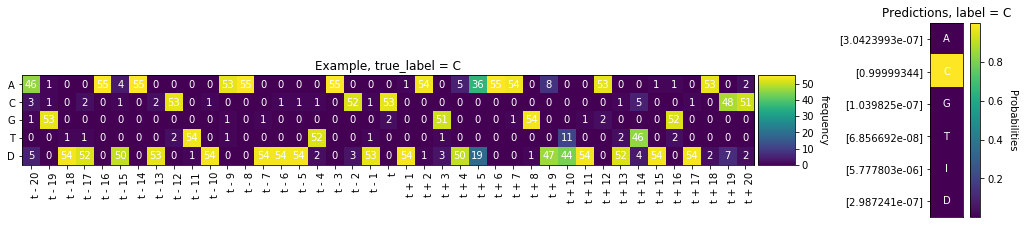

In [6]:
num_display = 1
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Inspect incorrect predictions

Total number of data: 24962
Number of A: 1585
Number of C: 929
Number of G: 689
Number of T: 1592
Number of I: 16585
Number of D: 3582


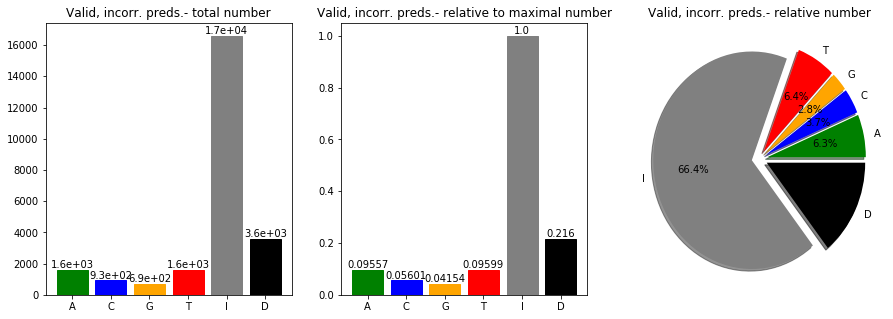

In [7]:
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[incorrect_indices], 'Valid, incorr. preds.')

### Inspect correct predictions

Total number of data: 3856374
Number of A: 741162
Number of C: 461819
Number of G: 460582
Number of T: 737512
Number of I: 1447043
Number of D: 8256


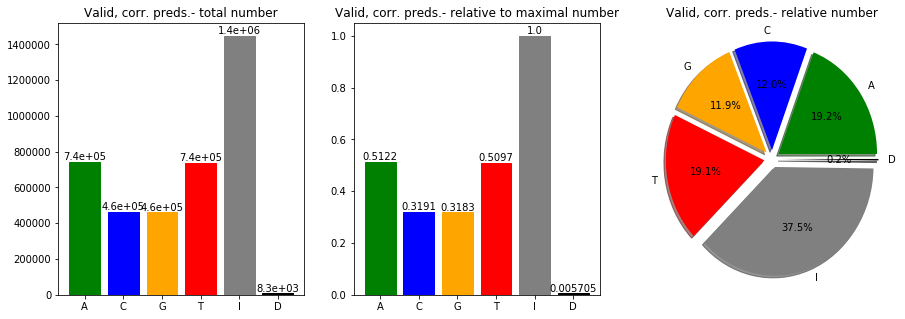

In [8]:
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[correct_indices], 'Valid, corr. preds.')

### Macro measure

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_M:', precision_score(y_validate, predictions, average='macro'))
print('Recall_M:', recall_score(y_validate, predictions, average='macro'))
print('F1_M', f1_score(y_validate, predictions, average='macro'))

Precision_M: 0.9463824119945515
Recall_M: 0.8944257306986972
F1_M 0.9126881119030621


### Micro measure

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_u:', precision_score(y_validate, predictions, average='micro'))
print('Recall_u:', recall_score(y_validate, predictions, average='micro'))
print('F1_u', f1_score(y_validate, predictions, average='micro'))

Precision_u: 0.9935687093310138
Recall_u: 0.9935687093310138
F1_u 0.9935687093310138


### Confusion matrix

Confusion matrix, without normalization
[[ 741162      85     211     285     885     119]
 [    167  461819      48     296     297     121]
 [    209      45  460582      87     256      92]
 [    287     179     197  737512     750     179]
 [   1228     336     431    1712 1447043   12878]
 [    465     325     460     549    1783    8256]]


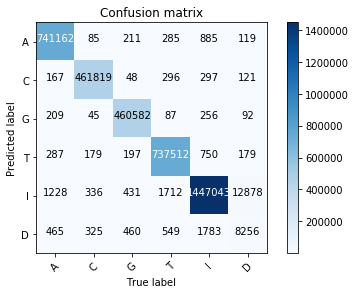

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_validate, axis=1), np.argmax(predictions,axis=1)).T
visualization.plot_confusion_matrix(cm, classes=['A', 'C', 'G', 'T', 'I', 'D'])

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_validate, predictions, target_names=['A', 'C', 'G', 'T', 'I', 'D'], digits=5))

             precision    recall  f1-score   support

          A    0.99787   0.99683   0.99735    743518
          C    0.99799   0.99790   0.99795    462789
          G    0.99851   0.99708   0.99779    461929
          T    0.99785   0.99604   0.99694    740441
          I    0.98867   0.99726   0.99295   1451014
          D    0.69742   0.38143   0.49315     21645

avg / total    0.99284   0.99357   0.99294   3881336

